<a href="https://colab.research.google.com/github/DIKBIT/mini-project-on-image-classification-/blob/main/mini_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [4]:
df = pd.read_csv('/content/train.csv')    # reading the csv file
df.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
df.shape

(7254, 27)

In [6]:
df.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [7]:
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg',target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

100%|██████████| 7254/7254 [2:01:08<00:00,  1.00s/it]


In [8]:
X.shape


(7254, 100, 100, 3)

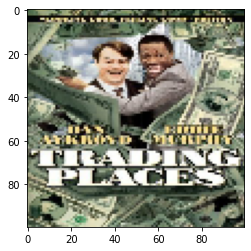

In [9]:
plt.imshow(X[2])

In [10]:
df['Genre'][2]

"['Comedy']"

In [11]:
# removing the id column 
y = np.array(df.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [ ]:
# splitting of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [ ]:
# getting the model summary
model.summary()


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(X_train, y_train)

In [ ]:
y_pred=model.pred(X_test)
y_pred

In [ ]:
img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/tt0084058.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

In [ ]:
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
img = image.load_img('/content/drive/MyDrive/Multi_Label_dataset/Images/tt0084867.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

In [ ]:
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
print(classification_report(y_pred,y_test))